In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)

from plotly import graph_objects as go

In [2]:
df = pd.read_csv('prepared_data.csv')

In [3]:
df

,region_id,user_id,search_id,category_id,subcategory_id,default,use_category,search_text,price_filter,bs_filter,discount_filter,delivery_filter,distance_filter,publication_filter,use_properties,sorting_published,sorting_distance,sorting_price,count_views,count_contacts,viewed,contacted
0,1,30313632666265376337646262666661,6637303136663335373937336235666230306430396564...,5,1F6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,30323639306161643537383935663331,6630633532393165613830656234353132616335623536...,5,1F6,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2,1,30363436653532323866363239623462,6566386663366562396635366530393064623563343966...,B,456,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,30396534363135383364316634623730,6331343932656563346335346136356136643437333864...,6,25A,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,30616662343038636464363761623339,3734623063393439393938623632336538373534386335...,6,25A,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113862,4,66623134393038346434623462306664,3532613333353562646431356665336132633662346266...,-1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3113863,4,66623561386566353539666463376631,3730353431636261343063393932363737643733633939...,-1,-1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3113864,4,66643363353536326237666331633333,6631636333306661363862323837363334643135306232...,-1,-1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3113865,4,66653738336237316139396465616630,3633333835656235376462393865663939353161376662...,-1,-1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [4]:
df['user_id'].nunique()

537624

In [4]:
print(f'Viewed : {round(df.viewed.mean()*100,2)}%')
print(f'Contacted of total : {round(df.contacted.mean()*100,2)}%')
print(f"Contacted of viewed : {round(df[df['viewed'] == 1].contacted.mean()*100,2)}%")

Viewed : 19.5%
Contacted of total : 0.73%
Contacted of viewed : 3.75%


In [17]:
fig = go.Figure(go.Funnel(
    y = ["Searches", "Views", "Contacts"],
    x = [df.shape[0], df.viewed.sum(), df.contacted.sum()],
    textposition = ["inside", "inside", "outside"],
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "teal"],
    "line": {"width": [4, 2, 1], "color": ["wheat", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}),
                go.Layout( {'title': {'text':'Общая воронка','x':0.5} })
    )

fig.show()

In [5]:
df.groupby('region_id')[['viewed', 'contacted']].sum()

,viewed,contacted
region_id,,
1,239484,9622
2,201985,7172
3,91288,3097
4,74501,2860


### Views and Contacts percentage by region

In [6]:
# Percentage viewed by region
round(df.groupby('region_id').viewed.mean()*100, 2).reset_index()

,region_id,viewed
0,1,18.88
1,2,20.63
2,3,18.99
3,4,19.33


In [7]:
# Percentage contacted after search by region
round(df.groupby('region_id').contacted.mean()*100, 2).reset_index()

,region_id,contacted
0,1,0.76
1,2,0.73
2,3,0.64
3,4,0.74


In [28]:
# Mean values by regions
round(df.groupby('region_id').mean()*100, 2)

,default,use_category,search_text,price_filter,bs_filter,discount_filter,delivery_filter,distance_filter,publication_filter,use_properties,sorting_published,sorting_distance,sorting_price,count_views,count_contacts,viewed,contacted
region_id,,,,,,,,,,,,,,,,,
1,44.25,33.06,28.53,3.65,0.09,0.09,0.19,8.64,2.30,4.24,2.67,96.29,0.70,47.67,1.13,18.88,0.76
2,44.99,31.76,29.95,2.84,0.09,0.10,0.17,7.46,2.27,3.96,2.66,95.79,1.26,53.16,1.04,20.63,0.73
3,44.96,34.48,25.97,3.58,0.10,0.10,0.23,8.22,2.30,4.83,2.92,96.01,0.74,48.17,0.91,18.99,0.64
4,45.44,30.89,30.64,2.74,0.09,0.14,0.23,5.15,2.29,3.90,2.59,96.23,0.88,50.81,1.07,19.33,0.74


In [8]:
# Percentage contacted after view by region
round(df[df['viewed'] == 1].groupby('region_id').contacted.mean()*100, 2).reset_index()

,region_id,contacted
0,1,4.02
1,2,3.55
2,3,3.39
3,4,3.84


**In 3d region contacted percentage is significantly lower**

In [9]:
df

,region_id,user_id,search_id,category_id,subcategory_id,default,use_category,search_text,price_filter,bs_filter,discount_filter,delivery_filter,distance_filter,publication_filter,use_properties,sorting_published,sorting_distance,sorting_price,count_views,count_contacts,viewed,contacted
0,1,30313632666265376337646262666661,6637303136663335373937336235666230306430396564...,5,1F6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,30323639306161643537383935663331,6630633532393165613830656234353132616335623536...,5,1F6,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2,1,30363436653532323866363239623462,6566386663366562396635366530393064623563343966...,B,456,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,30396534363135383364316634623730,6331343932656563346335346136356136643437333864...,6,25A,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,30616662343038636464363761623339,3734623063393439393938623632336538373534386335...,6,25A,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113862,4,66623134393038346434623462306664,3532613333353562646431356665336132633662346266...,-1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3113863,4,66623561386566353539666463376631,3730353431636261343063393932363737643733633939...,-1,-1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3113864,4,66643363353536326237666331633333,6631636333306661363862323837363334643135306232...,-1,-1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3113865,4,66653738336237316139396465616630,3633333835656235376462393865663939353161376662...,-1,-1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [29]:
round(df.groupby('contacted').mean()*100, 2)

,region_id,default,use_category,search_text,price_filter,bs_filter,discount_filter,delivery_filter,distance_filter,publication_filter,use_properties,sorting_published,sorting_distance,sorting_price,count_views,count_contacts,viewed
contacted,,,,,,,,,,,,,,,,,
0,199.48,44.89,32.52,28.70,3.25,0.09,0.10,0.19,7.75,2.3,4.18,2.69,96.09,0.90,45.61,0.00,18.91
1,196.46,24.03,43.42,48.02,6.32,0.10,0.03,0.12,10.75,1.6,6.58,2.80,95.59,1.61,628.40,145.09,99.98


In [33]:
for col in df.columns[-17:-4]:
    print(f'\n')
    #print((df[df['category_id'] != '-1'].groupby(col)[['viewed', 'contacted']].mean()*100).reset_index())
    print((df.groupby(col)[['viewed', 'contacted']].mean()*100).reset_index())



   default     viewed  contacted
0        0  19.376390    1.00452
1        1  19.656547    0.39235


   use_category     viewed  contacted
0             0  19.728391   0.613407
1             1  19.033215   0.972951


   search_text     viewed  contacted
0            0  18.672939   0.533698
1            1  21.546801   1.216582


   price_filter     viewed  contacted
0             0  19.566613   0.707561
1             1  17.582590   1.413167


   bs_filter     viewed  contacted
0          0  19.497037   0.730600
1          1  24.606781   0.768962


   discount_filter     viewed  contacted
0                0  19.498388   0.731178
1                1  22.821577   0.191510


   delivery_filter     viewed  contacted
0                0  19.509468   0.731139
1                1  15.478581   0.468541


   distance_filter     viewed  contacted
0                0  19.570928   0.707054
1                1  18.680383   1.010544


   publication_filter     viewed  contacted
0                   0  19.

## Difference by region

In [45]:
round(pd.pivot_table(df, columns=['region_id'], index = 'sorting_price', values = 'contacted', aggfunc= 'mean')*100, 2)

region_id,1,2,3,4
sorting_price,,,,
0,0.76,0.72,0.64,0.74
1,1.07,1.36,1.51,1.45


In [46]:
round(pd.pivot_table(df, columns=['region_id'], index = 'discount_filter', values = 'contacted', aggfunc= 'mean')*100,2)

region_id,1,2,3,4
discount_filter,,,,
0,0.76,0.73,0.64,0.74
1,0.09,0.00,0.21,0.74


In [58]:
round(pd.pivot_table(df, columns=['region_id'], index = ['default'], values = 'contacted', aggfunc= 'mean')*100, 2)

region_id,1,2,3,4
default,,,,
0,1.04,1.0,0.88,1.05
1,0.41,0.4,0.36,0.37


In [55]:
pd.concat([round(pd.pivot_table(df, columns=['region_id'], index = ['price_filter'], values = 'contacted', aggfunc= 'mean')*100,2),
           round(pd.pivot_table(df, columns=['region_id'], index = ['bs_filter'], values = 'contacted', aggfunc= 'mean')*100,2),
           round(pd.pivot_table(df, columns=['region_id'], index = ['discount_filter'], values = 'contacted', aggfunc= 'mean')*100,2),
           round(pd.pivot_table(df, columns=['region_id'], index = ['delivery_filter'], values = 'contacted', aggfunc= 'mean')*100,2),
           round(pd.pivot_table(df, columns=['region_id'], index = ['distance_filter'], values = 'contacted', aggfunc= 'mean')*100,2),
           round(pd.pivot_table(df, columns=['region_id'], index = ['publication_filter'], values = 'contacted', aggfunc= 'mean')*100,2),
           round(pd.pivot_table(df, columns=['region_id'], index = ['sorting_published'], values = 'contacted', aggfunc= 'mean')*100,2),
           round(pd.pivot_table(df, columns=['region_id'], index = ['sorting_distance'], values = 'contacted', aggfunc= 'mean')*100,2),
           round(pd.pivot_table(df, columns=['region_id'], index = ['sorting_price'], values = 'contacted', aggfunc= 'mean')*100,2)
          ])





region_id,1,2,3,4
0,0.74,0.70,0.63,0.72
1,1.26,1.79,1.12,1.55
0,0.76,0.73,0.64,0.74
1,1.02,0.59,0.21,1.14
0,0.76,0.73,0.64,0.74
1,0.09,0.00,0.21,0.74
0,0.76,0.73,0.65,0.74
1,0.47,0.42,0.09,1.02
0,0.73,0.70,0.62,0.73
1,1.02,1.09,0.88,0.91


### Check for significance in difference with Z-proportion test

In [30]:
from statsmodels.stats.proportion import proportions_ztest

In [31]:
df.head()

,region_id,user_id,search_id,category_id,subcategory_id,default,use_category,search_text,price_filter,bs_filter,discount_filter,delivery_filter,distance_filter,publication_filter,use_properties,sorting_published,sorting_distance,sorting_price,count_views,count_contacts,viewed,contacted
0,1,30313632666265376337646262666661,6637303136663335373937336235666230306430396564...,5,1F6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,30323639306161643537383935663331,6630633532393165613830656234353132616335623536...,5,1F6,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2,1,30363436653532323866363239623462,6566386663366562396635366530393064623563343966...,B,456,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,30396534363135383364316634623730,6331343932656563346335346136356136643437333864...,6,25A,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,30616662343038636464363761623339,3734623063393439393938623632336538373534386335...,6,25A,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [33]:
df[(df['sorting_price'] == 1) & (df['contacted'] == 1)].shape[0]

366

In [57]:
for criteria in df.columns[-17:-4]:
    
    for region in [1,2,3,4]:

        used_criteria_contacted = df[(df[criteria] == 1) & (df['contacted'] == 1) & (df['region_id'] == region)].shape[0]
        used_criteria_all = df[(df[criteria] == 1) & (df['region_id'] == region)].shape[0]
        not_used_criteria_contacted = df[(df[criteria] == 0) & (df['contacted'] == 1) & (df['region_id'] == region)].shape[0]
        not_used_criteria_all = df[(df[criteria] == 0) & (df['region_id'] == region)].shape[0]


        used_criteria = np.array([used_criteria_contacted, not_used_criteria_contacted])
        total         = np.array([used_criteria_all,       not_used_criteria_all])

        z,p = proportions_ztest(used_criteria, total, value=0, alternative='two-sided')

        if p < 0.05:
            print(f'{criteria} difference in % contacted in region {region}: p-value = {round(p,4)} \n')

default difference in % contacted in region 1: p-value = 0.0 

default difference in % contacted in region 2: p-value = 0.0 

default difference in % contacted in region 3: p-value = 0.0 

default difference in % contacted in region 4: p-value = 0.0 

use_category difference in % contacted in region 1: p-value = 0.0 

use_category difference in % contacted in region 2: p-value = 0.0 

use_category difference in % contacted in region 3: p-value = 0.0 

use_category difference in % contacted in region 4: p-value = 0.0 

search_text difference in % contacted in region 1: p-value = 0.0 

search_text difference in % contacted in region 2: p-value = 0.0 

search_text difference in % contacted in region 3: p-value = 0.0 

search_text difference in % contacted in region 4: p-value = 0.0 

price_filter difference in % contacted in region 1: p-value = 0.0 

price_filter difference in % contacted in region 2: p-value = 0.0 

price_filter difference in % contacted in region 3: p-value = 0.0 

pric

In [72]:
round(pd.pivot_table(df, columns=['region_id'], index = ['sorting_price'], values = 'contacted', aggfunc= 'mean')*100, 2)





region_id,1,2,3,4
sorting_price,,,,
0,0.76,0.72,0.64,0.74
1,1.07,1.36,1.51,1.45


In [66]:
df.groupby('distance_filter')['contacted'].mean()

distance_filter
0    0.007071
1    0.010105
Name: contacted, dtype: float64

In [ ]:
## 1. Автоматическая геолокация сразу при входе на сайт
## 2. Автоматически выставлять сортировку по цене

In [18]:
df.head()

,region_id,user_id,search_id,category_id,subcategory_id,default,use_category,search_text,price_filter,bs_filter,discount_filter,delivery_filter,distance_filter,publication_filter,use_properties,sorting_published,sorting_distance,sorting_price,count_views,count_contacts,viewed,contacted
0,1,30313632666265376337646262666661,6637303136663335373937336235666230306430396564...,5,1F6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,30323639306161643537383935663331,6630633532393165613830656234353132616335623536...,5,1F6,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2,1,30363436653532323866363239623462,6566386663366562396635366530393064623563343966...,B,456,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,30396534363135383364316634623730,6331343932656563346335346136356136643437333864...,6,25A,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,30616662343038636464363761623339,3734623063393439393938623632336538373534386335...,6,25A,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


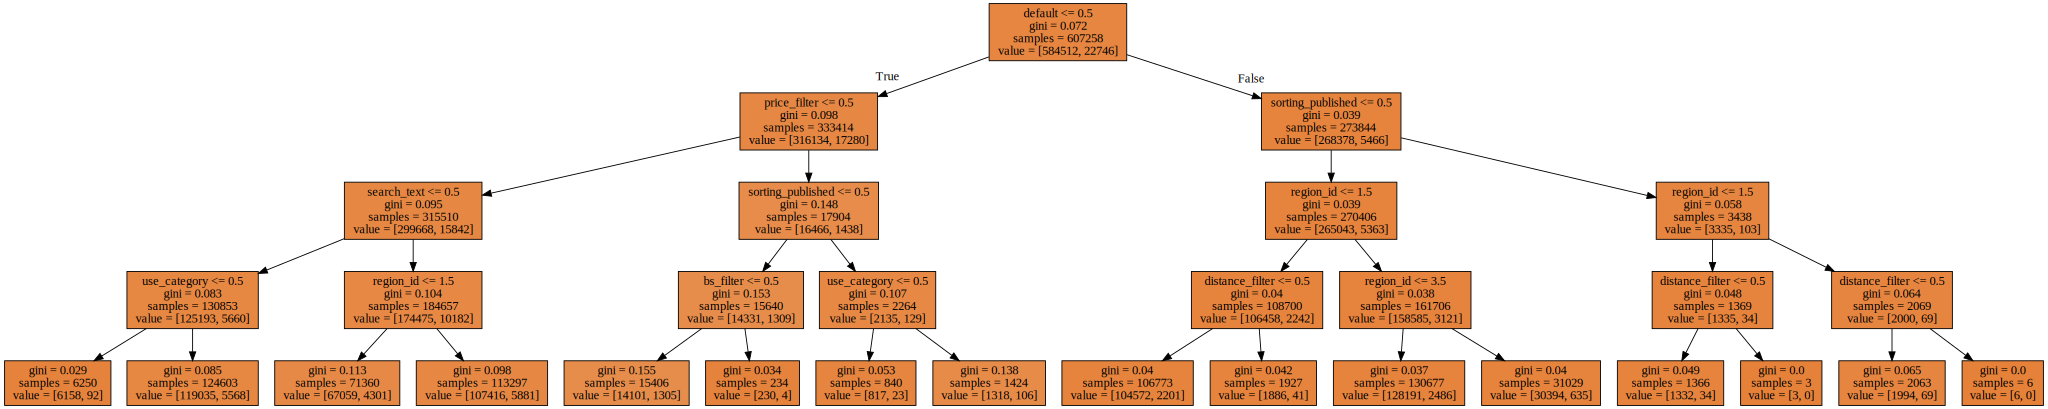

In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree


X = df[df['viewed'] == 1].drop(['user_id', 'search_id', 'category_id', 'subcategory_id', 'viewed', 
             'contacted', 'count_views', 'count_contacts'], axis = 1)

names = df.drop(['user_id', 'search_id', 'category_id', 'subcategory_id', 'viewed', 
             'contacted', 'count_views', 'count_contacts'], axis = 1).columns

y = df[df['viewed'] == 1]['contacted']

dtree = DecisionTreeClassifier(max_depth= 4, random_state= 17)
dtree.fit(X, y)


estimator = dtree


graph = Source(tree.export_graphviz(estimator, out_file=None,
    feature_names=names, #class_names=['0', '1'] ,
    filled = True))
display(SVG(graph.pipe(format='svg')))